In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import fpsnippets

df = pd.read_csv('AQEData.csv')

location_pollution = df.groupby(['lat', 'lon'])['tons_per_yr'].sum().reset_index()

location_pollution['neighborhood'] = location_pollution.apply(
    lambda row: fpsnippets.geo_to_neighborhood(row['lat'], row['lon']),
    axis=1
)

neighborhood_avg_pollution = location_pollution.groupby('neighborhood')['tons_per_yr'].mean().reset_index()

neighborhood_avg_pollution_sorted = neighborhood_avg_pollution.sort_values(by='tons_per_yr', ascending=True)

print("Neighborhoods with the lowest average air pollution:")
print(neighborhood_avg_pollution_sorted.head(15))

Neighborhoods with the lowest average air pollution:
                neighborhood   tons_per_yr
5                    Carrick      3.160000
14             Homewood West      3.160000
11                    Esplen      5.840000
24       Squirrel Hill South      7.630000
20        Point Breeze North    118.430000
27       Upper Lawrenceville    188.677800
12                 Fairywood    304.280000
15                   Larimer    534.410000
23          South Side Flats   1294.155000
17       Lower Lawrenceville   1451.656545
4       California-Kirkbride   1981.590000
8                    Chateau   2079.330000
16  Lincoln-Lemington-Belmar   7444.010000
3                  Brookline   9437.223400
2                      Bluff  12648.700400


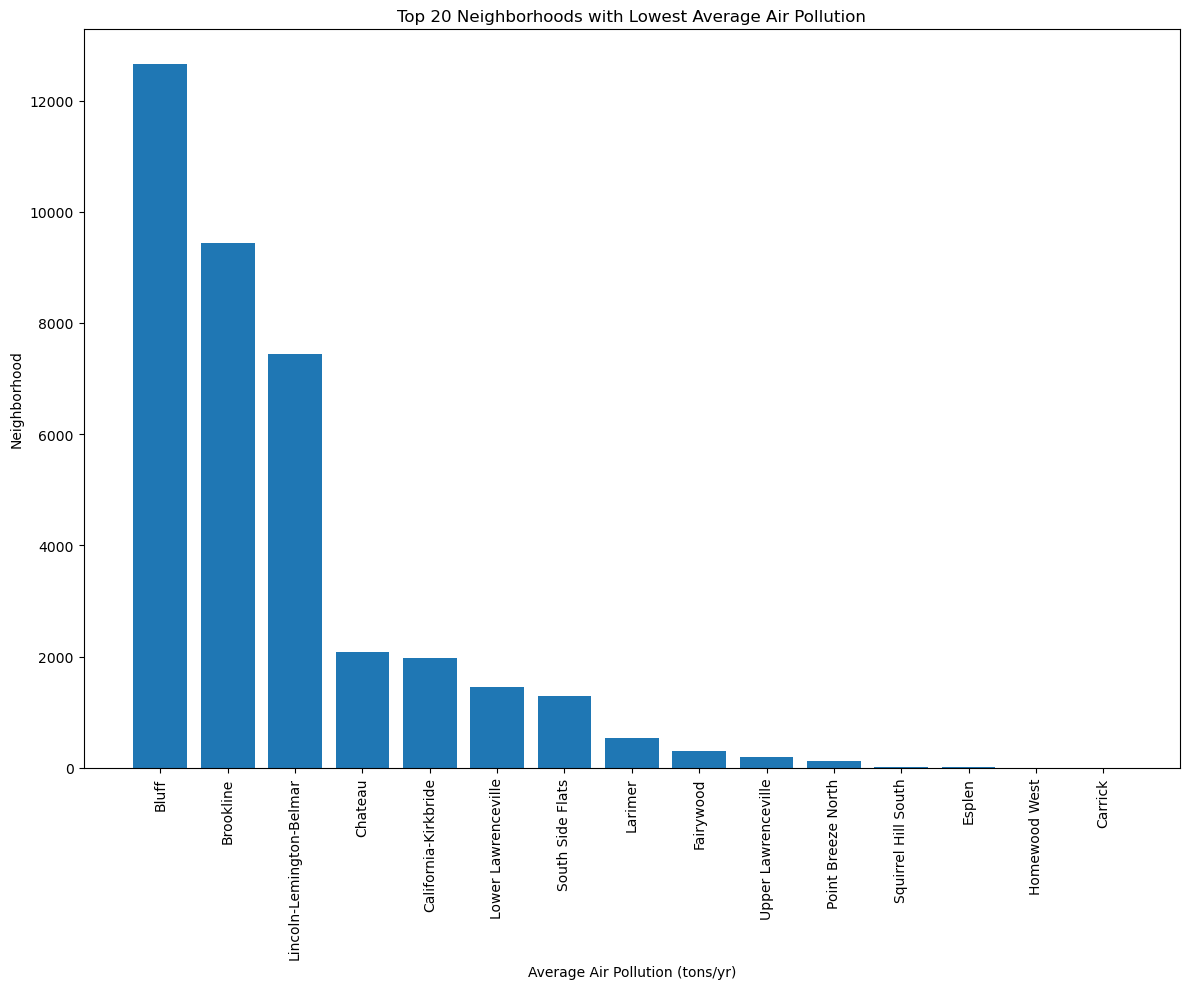

In [11]:
top_20_lowest = neighborhood_avg_pollution_sorted.head(15)

plt.figure(figsize=(12, 10))
plt.bar(
    top_20_lowest['neighborhood'].iloc[::-1],
    top_20_lowest['tons_per_yr'].iloc[::-1]
)

plt.xlabel('Average Air Pollution (tons/yr)')
plt.ylabel('Neighborhood')
plt.title('Top 20 Neighborhoods with Lowest Average Air Pollution')

plt.xticks(rotation=90)
plt.tight_layout()

plt.show()